# Feature Selection
---
In machine learning and statistics, feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Some advantages include: 
- simplification of models to make them easier to interpret by researchers/users
- shorter training times
- to avoid the curse of dimensionality
- enhanced generalization by reducing overfitting (by reducing variance)

Features gathered from the observation of a phenomenon are not all equally
informative: some of them may be noisy, correlated or irrelevant. Feature
selection aims at selecting a feature set that is relevant for a given task. This
problem is complex and remains an important issue in many domains. 

Contents: 
- [Feature selection by the Boruta Algorithm](#boruta)
- [Feature selection by Random Forest](#random-forest)

In [4]:
# import external modules
import sys, os
ROOT_PATH = os.path.abspath(".").split("src")[0]
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/src/utils/"))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import functions as f

SEED=100; np.random.seed(100)

In [5]:
c, p = f.color_palette()
sns.set(context='paper', style='whitegrid', palette=np.array(p))
plt.style.use('file://' + ROOT_PATH + "src/utils/plotparams.rc")

**Loading the data**

In [6]:
# load scaled datasets 
path = ROOT_PATH + "data/dataframes/"
df_train = pd.read_pickle(path + "df_scaled_train.pkl")
df_valid = pd.read_pickle(path + "df_scaled_valid.pkl")
df_test = pd.read_pickle(path + "df_scaled_test.pkl")

# split datasets into features and targets
x_train, y_train = f.split_dataset(df_train.values, delay=1)
x_valid, y_valid = f.split_dataset(df_valid.values, delay=1)
x_test, y_test = f.split_dataset(df_test.values, delay=1)

# load metadata
path = ROOT_PATH + "data/metadata/"
scaling_stats = pd.read_csv(path+"scaling_stats.csv", index_col=0)
target_tags = df_train.columns.values[:3]
feature_tags = df_train.columns.values[3:]
target_stds = scaling_stats.loc[target_tags,"Std"].values
target_means = scaling_stats.loc[target_tags,"Mean"].values

print(df_train.shape, df_valid.shape, df_test.shape)

(53211, 21) (17737, 21) (17737, 21)


In [188]:
def shorten_tagname(tag):
    nname = tag.split("VAL_23")[1][1:]
    nname = nname.split(".Value")[0]
    nname = nname.split(":VALUE")[0]
    nname = nname.split(":X")[0]
    
    if "KA_9101" in nname:
        nname = nname.split(":Z.X")[0]
    return nname

short_feature_tags = np.array([shorten_tagname(tag) for tag in feature_tags])

<a class="anchor" id="boruta"></a>

---
## [1] Feature Selection by the  Boruta Algorithm

Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error. The Boruta algorithm is a Random Forest classification algorithm that we'll use to perform a top-down search for relevant features by comparing original attributes' importance with importance achievable at random, estimated using their permuted copies, and progressively eliminating irrelevant features.

We must run a separate run for each of our targets. Finally, all "confirmed" tags will be concatenated together and represent the chosen features. 

In [9]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
np.warnings.filterwarnings('ignore')

In [329]:
def run_boruta(X, y, ntrees=500):
    forest = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=SEED)
    feat_selector = BorutaPy(forest, n_estimators=ntrees, verbose=1, random_state=SEED, max_iter=100)
    feat_selector.fit(X,y)
    
    return forest, feat_selector

In [330]:
flow_forest, flow_boruta = run_boruta(x_train, y_train[:,0])

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [331]:
temp_forest, temp_boruta = run_boruta(x_train, y_train[:,1])

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [332]:
pres_forest, pres_boruta = run_boruta(x_train, y_train[:,2])

Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100
Iteration: 38 / 100
Iteration: 39 / 100
Iteration: 40 / 100
Iteration: 41 / 100
Iteration: 42 / 100
Iteration: 43 / 100
Iteration: 44 / 100
Iteration: 45 / 100
Iteration: 46 / 100
Iteration: 47 / 100
Iteration: 48 / 100
Iteration: 49 / 100
Iteration: 50 / 100
Iteration

In [333]:
def get_common_targets(tag, identifier, 
                       feature_tags=short_feature_tags, 
                       selectors=[flow_boruta, temp_boruta, pres_boruta],
                       identifiers=["FT", "TT", "PT"]):
    
        idx = identifiers.index(identifier)
        tmp_selectors = [selectors[i] for i in range(len(selectors)) if i != idx]
        tmp_identifiers = [identifiers[i] for i in range(len(selectors)) if i != idx]

        common = []
        for feat_selector, str_id in zip(tmp_selectors, tmp_identifiers):
            if tag in feature_tags[feat_selector.support_]:
                common.append(str_id)


        return ", ".join(common)

def build_feature_rank_df(feat_selector, identifier, feature_tags=short_feature_tags):
    feat_dict = {
        "Tag": feature_tags,
        "Important": feat_selector.support_,
        "Rank": feat_selector.ranking_,
    }

    df = pd.DataFrame(feat_dict).sort_values(by=["Rank", "Tag"])
    
    df["Shared"] = [get_common_targets(tag, identifier) for tag in df.Tag]
    df.index = range(len(df))
    
    str_table = tabulate(df, headers='keys', tablefmt='psql', floatfmt='.5f')
    
    return df, str_table

df_ft, table_ft = build_feature_rank_df(flow_boruta, "FT")
df_tt, table_tt = build_feature_rank_df(temp_boruta, "FT")
df_pt, table_pt = build_feature_rank_df(pres_boruta, "FT")

print("\nDischarge flow\n", table_tt)
print("\nDischarge temperature\n", table_tt)
print("\nDischarge pressure\n", table_pt)


Discharge flow
 +----+-----------------+-------------+--------+----------+
|    | Tag             | Important   |   Rank | Shared   |
|----+-----------------+-------------+--------+----------|
|  0 | FT-92521        | True        |      1 | TT, PT   |
|  1 | KA-9101_ASP     | True        |      1 | TT       |
|  2 | KA-9101_ESP     | True        |      1 | TT, PT   |
|  3 | KA_9101_M01_62C | True        |      1 | TT, PT   |
|  4 | LIC-92521:Z.X   | True        |      1 | TT, PT   |
|  5 | LIC-92521:Z.Y   | True        |      1 | TT, PT   |
|  6 | LT-92523:Z.X2   | True        |      1 | TT, PT   |
|  7 | PDT-92502       | True        |      1 | TT, PT   |
|  8 | PDT-92522       | True        |      1 | TT       |
|  9 | PDT-92534       | True        |      1 | TT, PT   |
| 10 | PT-92512        | True        |      1 | TT, PT   |
| 11 | TIC-92504:Z.X   | True        |      1 | TT, PT   |
| 12 | TT-92512        | True        |      1 | TT, PT   |
| 13 | TT_92532:Z.X    | True        | 

In [334]:
confirmed_ft = feature_tags[flow_boruta.support_]
confirmed_tt = feature_tags[temp_boruta.support_]
confirmed_pt = feature_tags[pres_boruta.support_]

all_confirmed = np.unique(np.concatenate((confirmed_ft, confirmed_tt, confirmed_pt)))
print("Total number of confirmed tags:", len(all_confirmed),"\n")
tmp=[print(i) for i in all_confirmed]

Total number of confirmed tags: 18 

VAL_23-FT-92512:X.Value
VAL_23-FT-92521:X.Value
VAL_23-KA-9101_ASP:VALUE
VAL_23-KA-9101_ESP:VALUE
VAL_23-LIC-92521:Z.X.Value
VAL_23-LIC-92521:Z.Y.Value
VAL_23-LT-92523:Z.X2.Value
VAL_23-PDT-92502:X.Value
VAL_23-PDT-92522:X.Value
VAL_23-PDT-92534:X.Value
VAL_23-PT-92512:X.Value
VAL_23-PT-92523:X.Value
VAL_23-TIC-92504:Z.X.Value
VAL_23-TT-92512:X.Value
VAL_23-VA-9110-M01-EL:XS.MeasuredValues.CurrentL2.Value.Value
VAL_23_KA_9101_M01_62C:Z.X.Value
VAL_23_TT_92532:Z.X.Value
VAL_23_ZT_92543:Z.X.Value


<a class="anchor" id="random-forest"></a>
---
## [2] Feature Selection by Random Forest

A second way to perform feature selection is to train a Random Forest which gives us "feature importances" for each of the features. The feature importance is decided from how often the variable has been used as a split criterion. Feature selection is done by choosing the X most important features based on the Random Forest. 

---

In [335]:
params_rf = {'n_estimators': 1000, 
             'max_depth': 5, 
             'min_samples_split': 2, 
             'max_features': 'auto', 
             'criterion': 'mse', 
             'random_state': 0, 
             'n_jobs': -1, 
             'oob_score': True,
             'verbose': 1
            }

rf = RandomForestRegressor(**params_rf)

In [336]:
rf_ft = RandomForestRegressor(**params_rf).fit(x_train, y_train[:,0])
rf_tt = RandomForestRegressor(**params_rf).fit(x_train, y_train[:,1])
rf_pt = RandomForestRegressor(**params_rf).fit(x_train, y_train[:,2])

rf_all = RandomForestRegressor(**params_rf).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   41.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   40.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:

In [337]:
def make_imp_df(rf, identifier): 
    imp_dict = {
        "Tag": short_feature_tags,
        "Importance": rf.feature_importances_
    }
    imp_df = pd.DataFrame(imp_dict).sort_values(by=["Importance"], ascending=False)
    imp_df.index = pd.Index(range(1,len(imp_df)+1), name="Rank")
    
    str_table = tabulate(imp_df, headers='keys', tablefmt='psql', floatfmt='.5f')
    
    return imp_df, str_table

In [338]:
rf_ft_df, table_ft = make_imp_df(rf_ft, "FT")
rf_tt_df, table_tt = make_imp_df(rf_tt, "TT")
rf_pt_df, table_pt = make_imp_df(rf_pt, "PT")
rf_all_df, table_all = make_imp_df(rf_all, "All")

num_imp = 5
important_ft = rf_ft_df[:num_imp]
important_tt = rf_tt_df[:num_imp]
important_pt = rf_pt_df[:num_imp]
important_all = rf_pt_df[:num_imp]

print("Top 5 features for each forest:",len(important_tags_combined),"unique tags.")
[print(i) for i in important_tags_combined]

print("\n\nForest by forest:")
print("\nFT")
print(table_ft)

print("\nTT")
print(table_tt)

print("\nPT")
print(table_pt)

print("\nAll")
print(table_all)


Top 5 features for each forest: 10 unique tags.
KA-9101_ESP
KA_9101_M01_62C
LIC-92521:Z.Y
PDT-92534
PT-92512
PT-92523
TIC-92504:Z.X
TT-92512
TT_92532:Z.X
ZT_92543:Z.X


Forest by forest:

FT
+--------+-----------------+--------------+
|   Rank | Tag             |   Importance |
|--------+-----------------+--------------|
|      1 | PDT-92534       |      0.53102 |
|      2 | PT-92523        |      0.18721 |
|      3 | ZT_92543:Z.X    |      0.06897 |
|      4 | PT-92512        |      0.05117 |
|      5 | KA_9101_M01_62C |      0.04945 |
|      6 | FT-92521        |      0.04466 |
|      7 | PDT-92502       |      0.02796 |
|      8 | FT-92512        |      0.01711 |
|      9 | LIC-92521:Z.Y   |      0.01318 |
|     10 | KA-9101_ESP     |      0.00310 |
|     11 | TT_92532:Z.X    |      0.00140 |
|     12 | TIC-92504:Z.X   |      0.00113 |
|     13 | VA-9110-M01-EL  |      0.00100 |
|     14 | PDT-92522       |      0.00089 |
|     15 | LT-92523:Z.X2   |      0.00064 |
|     16 | LIC-92

In [339]:
dfs = [rf_ft_df, rf_tt_df, rf_pt_df, rf_all_df]
important_tags_combined = np.unique(np.concatenate((important_ft.Tag, important_tt.Tag, important_pt.Tag, important_all.Tag)))
avg_importances = [np.mean([df[df.Tag == tag].Importance.values[0] for df in dfs]) for tag in important_tags_combined]
tot_df = pd.DataFrame({"Tag": important_tags_combined, "Avg. Importance": avg_importances})
tot_df = tot_df.sort_values(by=["Avg. Importance"], ascending=False)
tot_df.index = pd.Index(range(1,len(tot_df)+1), name="Rank")
print(tabulate(tot_df, headers='keys', tablefmt='psql', floatfmt='.5f'))



+--------+-----------------+-------------------+
|   Rank | Tag             |   Avg. Importance |
|--------+-----------------+-------------------|
|      1 | TT_92532:Z.X    |           0.31352 |
|      2 | PT-92523        |           0.30843 |
|      3 | PDT-92534       |           0.14678 |
|      4 | PT-92512        |           0.07998 |
|      5 | ZT_92543:Z.X    |           0.07633 |
|      6 | KA_9101_M01_62C |           0.02176 |
|      7 | TT-92512        |           0.00884 |
|      8 | LIC-92521:Z.Y   |           0.00813 |
|      9 | KA-9101_ESP     |           0.00495 |
|     10 | TIC-92504:Z.X   |           0.00184 |
+--------+-----------------+-------------------+


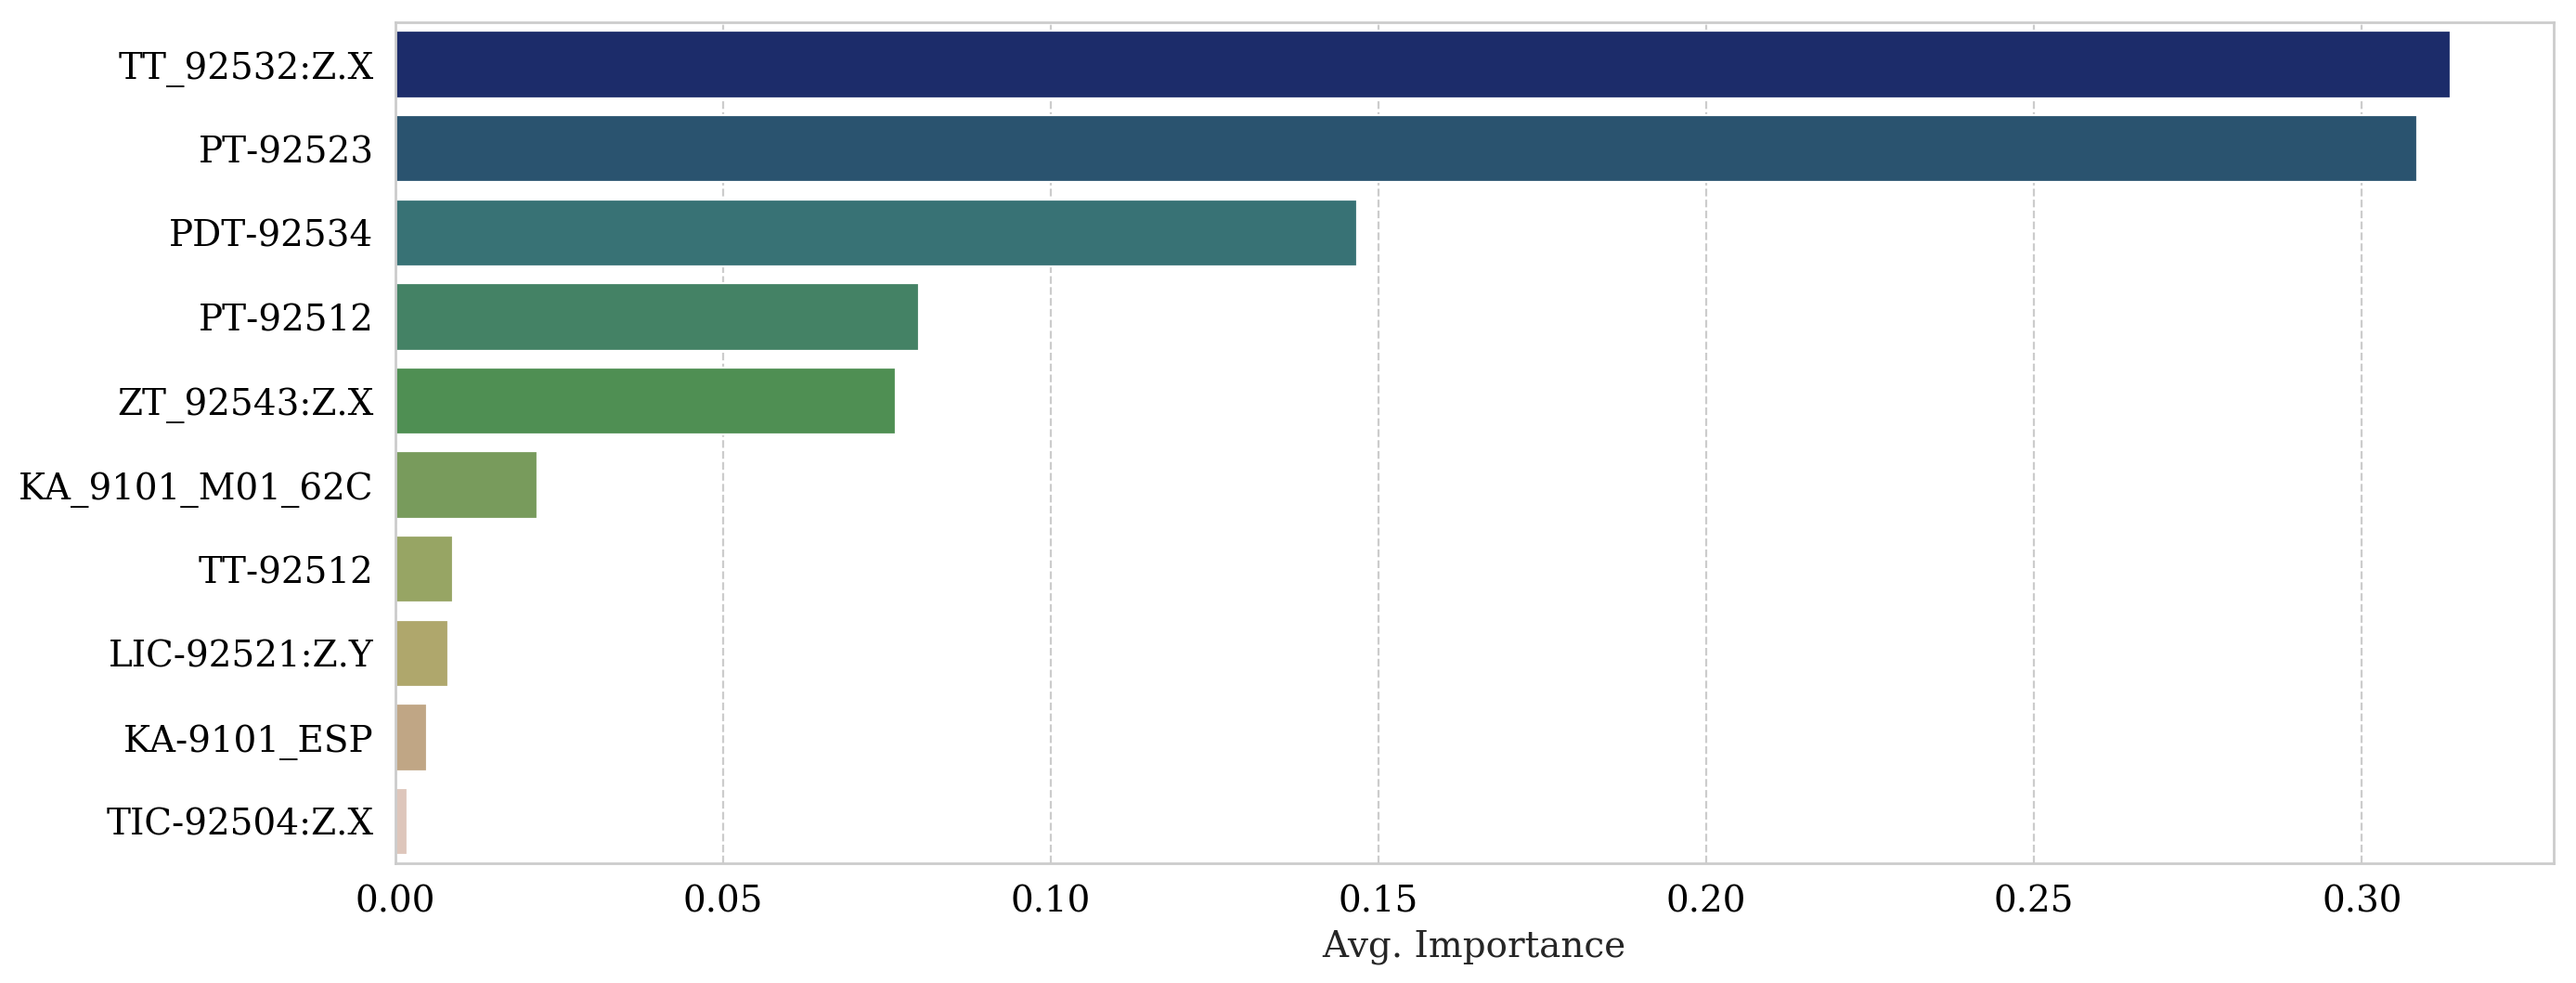

In [347]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x="Avg. Importance", y="Tag", data=tot_df, palette='gist_earth')
ax.set_ylabel("")
fig.show()

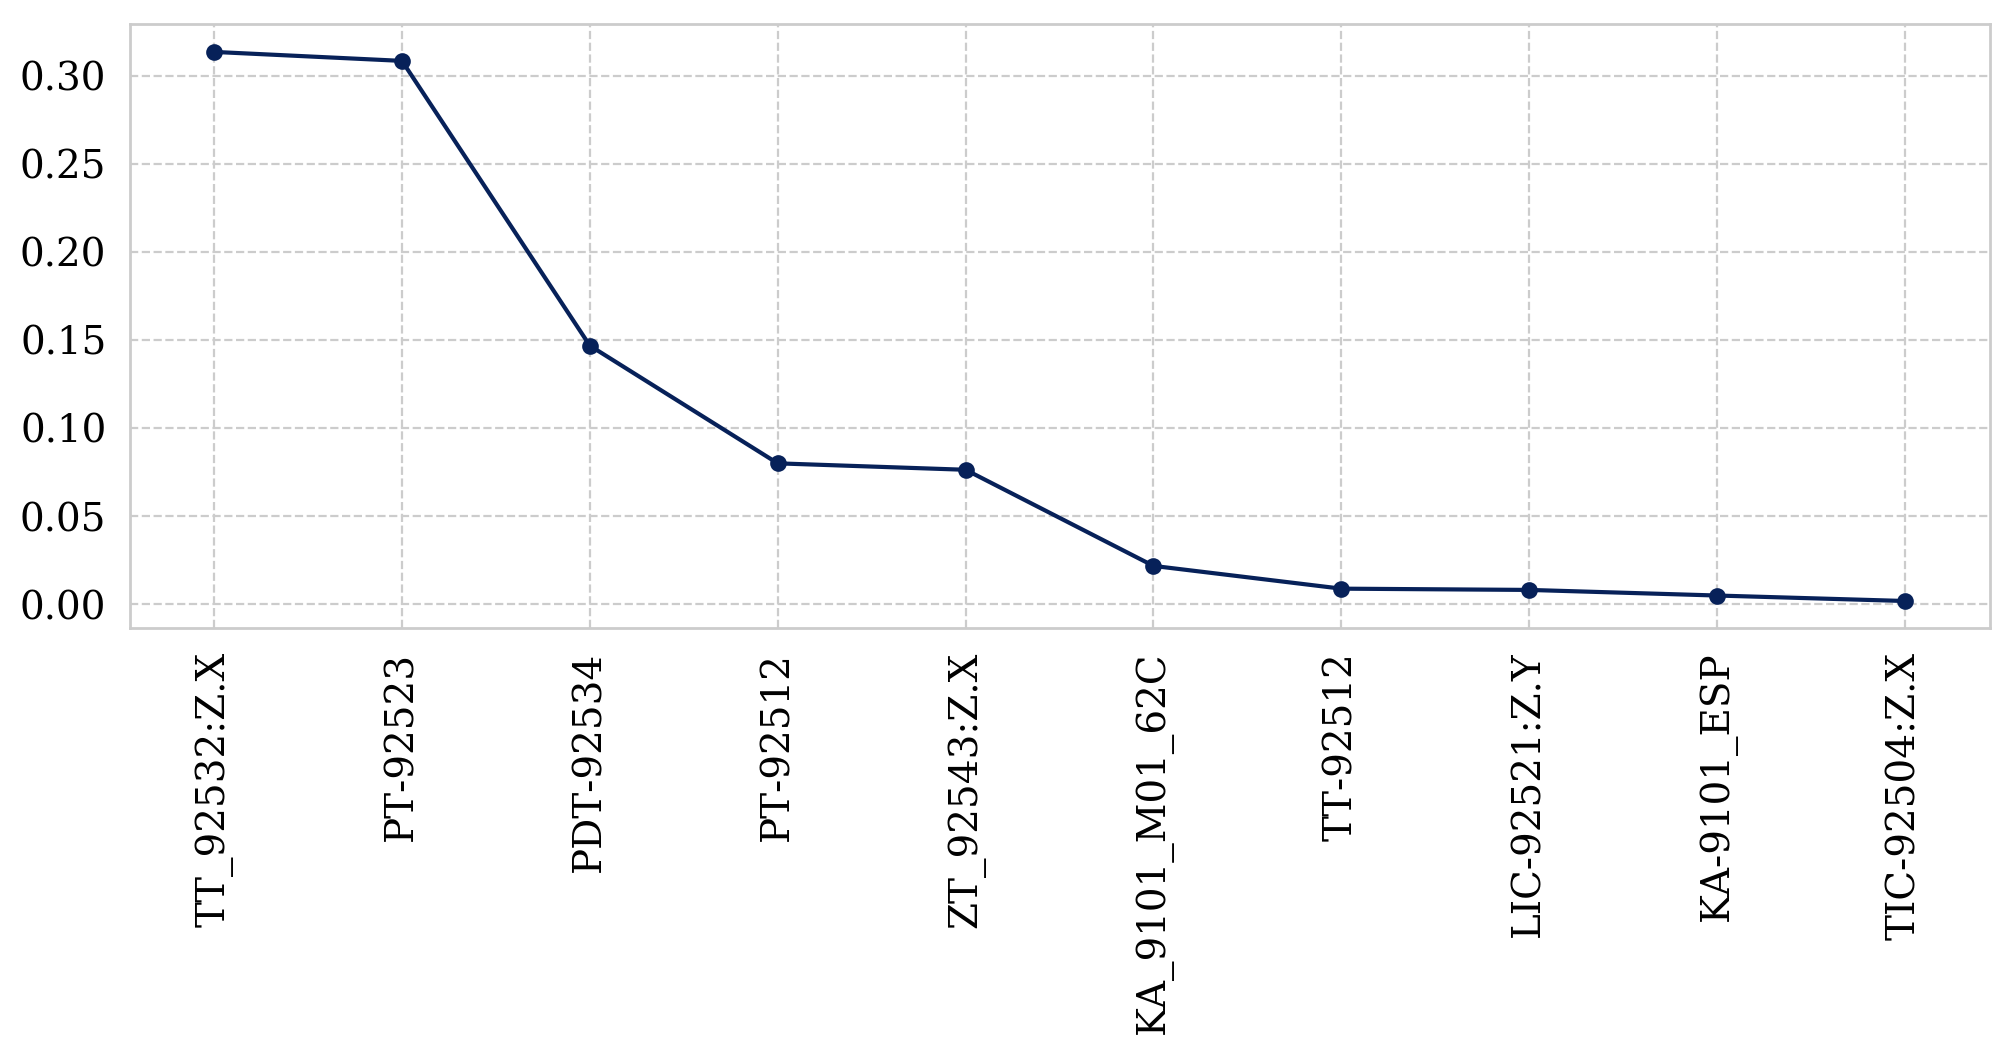

In [341]:
plt.figure()
plt.plot(tot_df["Avg. Importance"], marker="o", markersize=5)
xticks = tot_df.Tag
plt.xticks(range(1,len(xticks)+1), xticks, rotation=90)
plt.show()